In [1]:
import pandas as pd 

pat =  pd.read_csv('pat.csv')
adv = pd.read_csv('adv.csv')
treat =  pd.read_csv('treat.csv')

,adverse_reaction
treat_type,
auralin,13
novodra,14


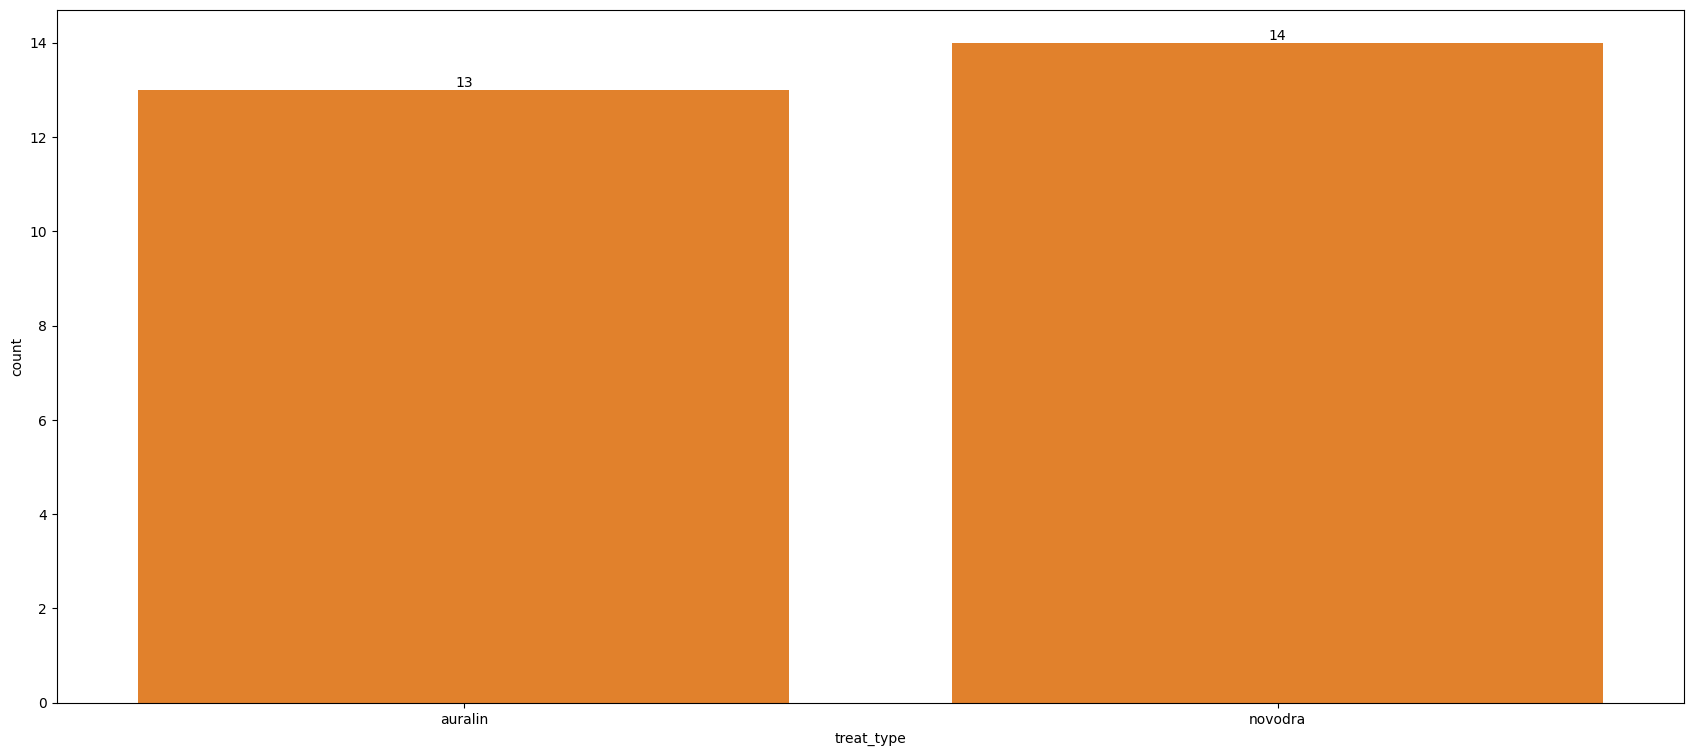

In [11]:
import seaborn as sns 
from matplotlib import pyplot as plt 
#Which treatments are associated with more adverse reactions?


plt.figure(figsize=[21,9])
sns.countplot(data=pat,x='treat_type').bar_label(sns.countplot(data=pat,x='treat_type').containers[0])
pat.groupby(['treat_type']).agg({'adverse_reaction':'count'})

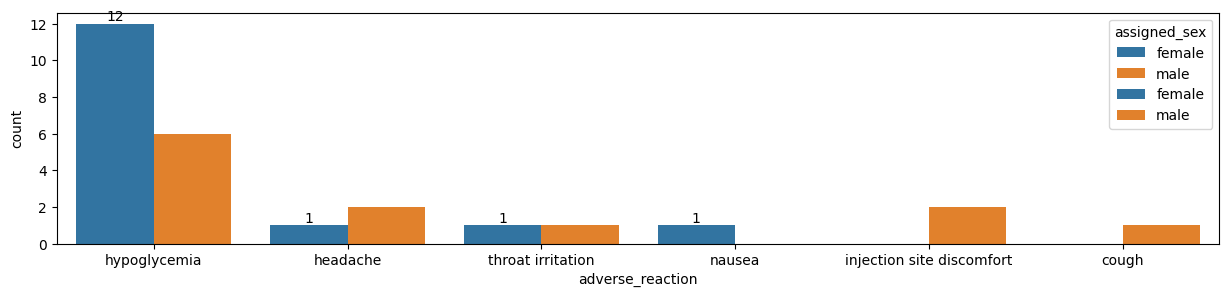

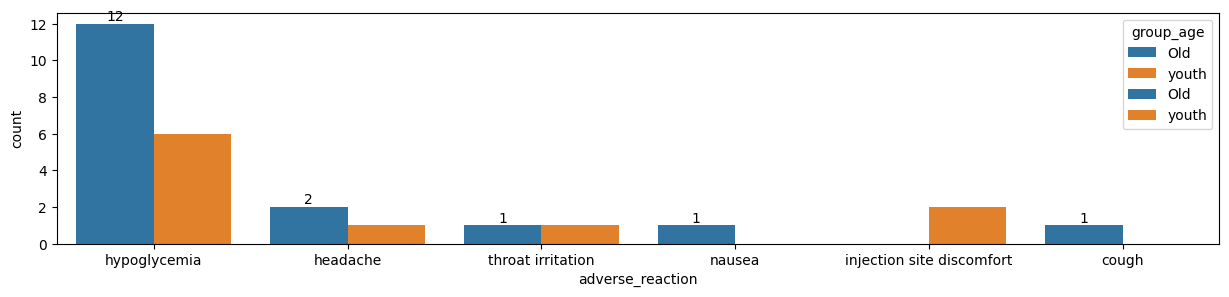

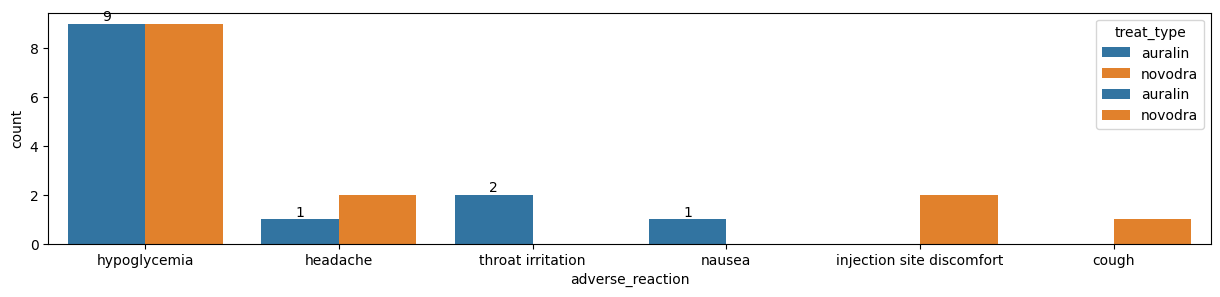

In [22]:
#Are specific adverse reactions common in certain groups?
huelist =  ['assigned_sex','group_age','treat_type']
for h in huelist:
    plt.figure(figsize=[15,3])
    sns.countplot(data=pat,hue=h,x='adverse_reaction').bar_label(sns.countplot(data=pat,hue=h,x='adverse_reaction').containers[0])
    plt.show()

In [ ]:
#Most common adverse reactions (Top 5).
pat['adverse_reaction'].value_counts().sort_values(ascending=False)



adverse_reaction
hypoglycemia                 18
headache                      3
throat irritation             2
injection site discomfort     2
nausea                        1
cough                         1
Name: count, dtype: int64

In [ ]:
#% of patients with any reported adverse reaction.
totalpat =  pd.read_csv('patients.csv')


In [ ]:
totalpat

totalpat['given_name'] =  totalpat['given_name'].str.lower()
totalpat['surname'] =  totalpat['surname'].str.lower()

In [33]:
totalpat

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,zoe,wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,pamela,hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,jae,debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,liêm,phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,tim,neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,mustafa,lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,ruman,bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,jinke,de keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,chidalu,onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [37]:
totalpat =  pd.merge(left=totalpat,right=adv,left_on=['given_name','surname'],right_on=['given_name','surname'],how='left').drop(columns={'Unnamed: 0'})

In [46]:
totalpat.shape
totalpat['adverse_reaction'].value_counts().sum()

percentofadvers =  34/503
print(percentofadvers)

0.06759443339960239


<Axes: >

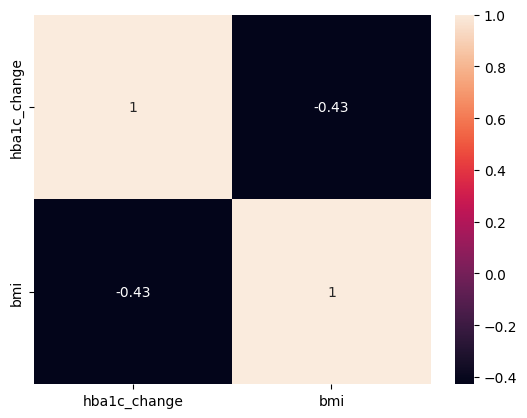

In [ ]:
#How does BMI correlate with treatment outcome?
pat[['hba1c_change','bmi']].corr()
sns.heatmap(data=pat[['hba1c_change','bmi']].corr(),annot=True)


In [ ]:
#Are overweight patients responding differently to treatments?
pat['weight'].value_counts().sort_index()
pat['w_group'] = 0


In [58]:
pat.loc[ (pat.weight >189) ,  'w_group'  ]  = 'over'
pat.loc[ (pat.weight <189) ,  'w_group'  ]  = 'normal'

C:\Users\mahmoud.sadiek\AppData\Local\Temp\ipykernel_18652\3862493927.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'over' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pat.loc[ (pat.weight >189) ,  'w_group'  ]  = 'over'


,hba1c_change
w_group,
normal,0.41
over,0.37


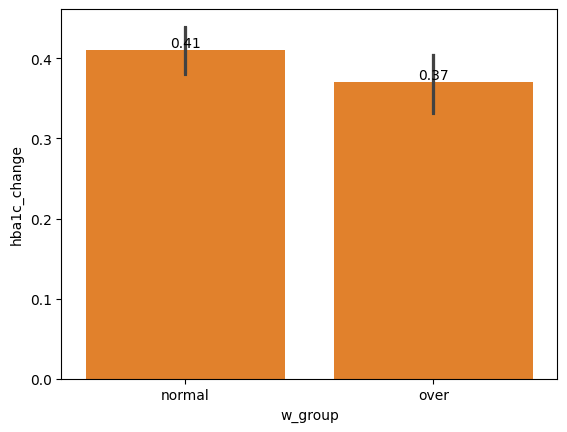

In [66]:
pat

sns.barplot(data=pat,x='w_group',y='hba1c_change').bar_label(sns.barplot(data=pat,x='w_group',y='hba1c_change').containers[0])
pat.groupby(['w_group']).agg({'hba1c_change':'mean'})

,bmi
treat_type,
auralin,26.369231
novodra,27.085714


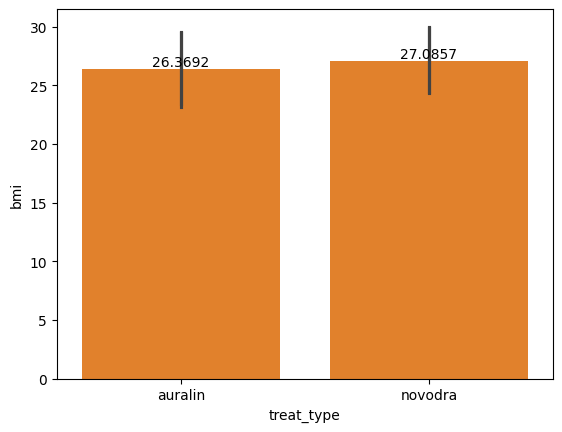

In [71]:
#Average BMI by treatment group.
sns.barplot(data=pat,x='treat_type',y='bmi').bar_label(sns.barplot(data=pat,x='treat_type',y='bmi').containers[0])
pat.groupby(['treat_type']).agg({'bmi':'mean'})

In [74]:
pat['bmi'].value_counts().sort_index()
pat['bmi_group'] = 0
pat.loc[ (pat.bmi >31) ,  'bmi_group'  ]  = 'over'
pat.loc[ (pat.bmi <31) ,  'bmi_group'  ]  = 'normal'

C:\Users\mahmoud.sadiek\AppData\Local\Temp\ipykernel_18652\1168967908.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'over' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pat.loc[ (pat.bmi >31) ,  'bmi_group'  ]  = 'over'


In [78]:
pat = pat.drop(columns={'state','city'})

In [81]:
pat['bmi_group'].value_counts(normalize=True)*100

bmi_group
normal    66.666667
over      33.333333
Name: proportion, dtype: float64